In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("data/merged_data_636.csv")

In [7]:
df.head()

,HR,P,PR,QRS,QT,QTc,P_Axis,QRS_Axis,T_Axis,RV5,SV1,target
0,105,86,117,88,345,456,45,18,16,1.533,0.952,1
1,51,101,157,83,414,385,-6,35,63,1.485,0.593,1
2,160,0,0,119,270,440,0,-39,-28,0.103,0.186,1
3,67,110,144,94,401,426,70,57,79,0.254,1.164,1
4,63,87,134,84,423,434,18,59,44,1.511,0.293,0


In [8]:
df.shape

(636, 12)

In [9]:
df.isnull().sum()

HR          0
P           0
PR          0
QRS         0
QT          0
QTc         0
P_Axis      0
QRS_Axis    0
T_Axis      0
RV5         0
SV1         0
target      0
dtype: int64

In [10]:
df.corr()

,HR,P,PR,QRS,QT,QTc,P_Axis,QRS_Axis,T_Axis,RV5,SV1,target
HR,1.000000,-0.181531,-0.276154,-0.016016,-0.744426,0.368784,0.131820,-0.071101,0.006901,-0.067068,0.014930,-0.011341
P,-0.181531,1.000000,0.800733,-0.028621,0.174402,0.059256,0.311517,0.056660,-0.014518,0.018411,-0.034714,0.020325
PR,-0.276154,0.800733,1.000000,0.087941,0.298404,0.079668,0.156401,-0.052676,0.056604,-0.127270,0.013476,0.011772
QRS,-0.016016,-0.028621,0.087941,1.000000,0.331515,0.399268,-0.050097,-0.245494,0.218512,-0.204083,0.269351,0.203832
QT,-0.744426,0.174402,0.298404,0.331515,1.000000,0.306476,-0.147958,-0.066696,0.062129,-0.077362,0.013591,0.143760
QTc,0.368784,0.059256,0.079668,0.399268,0.306476,1.000000,0.019123,-0.197217,0.100015,-0.220644,0.064881,0.136095
P_Axis,0.131820,0.311517,0.156401,-0.050097,-0.147958,0.019123,1.000000,0.167633,0.107575,0.057531,-0.049359,-0.025799
QRS_Axis,-0.071101,0.056660,-0.052676,-0.245494,-0.066696,-0.197217,0.167633,1.000000,-0.035548,0.141222,-0.219056,-0.046301
T_Axis,0.006901,-0.014518,0.056604,0.218512,0.062129,0.100015,0.107575,-0.035548,1.000000,-0.020571,0.242679,0.103824
RV5,-0.067068,0.018411,-0.127270,-0.204083,-0.077362,-0.220644,0.057531,0.141222,-0.020571,1.000000,0.124554,-0.043343


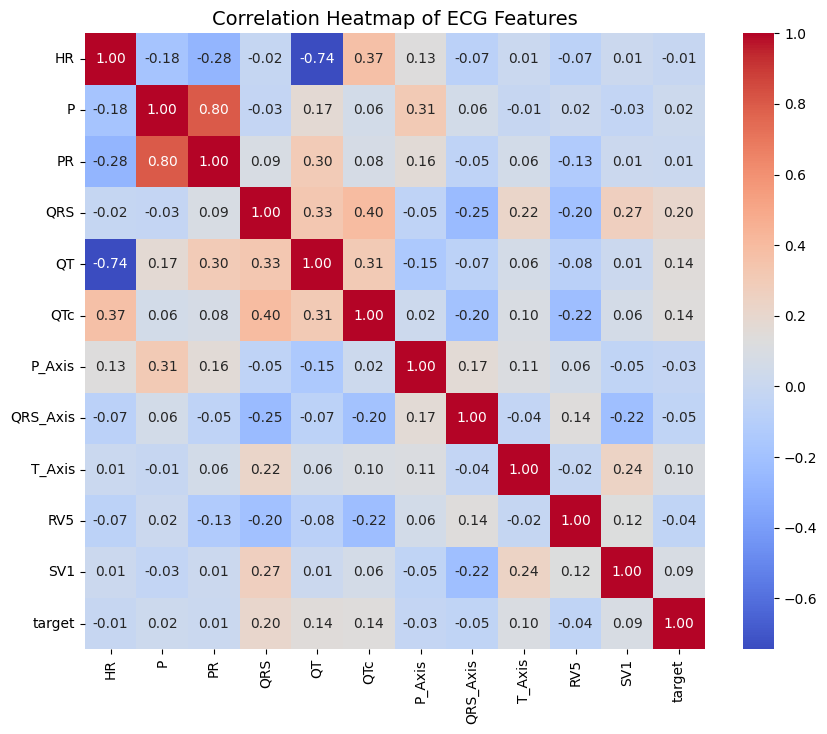

In [11]:

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap of ECG Features", fontsize=14)
plt.show()

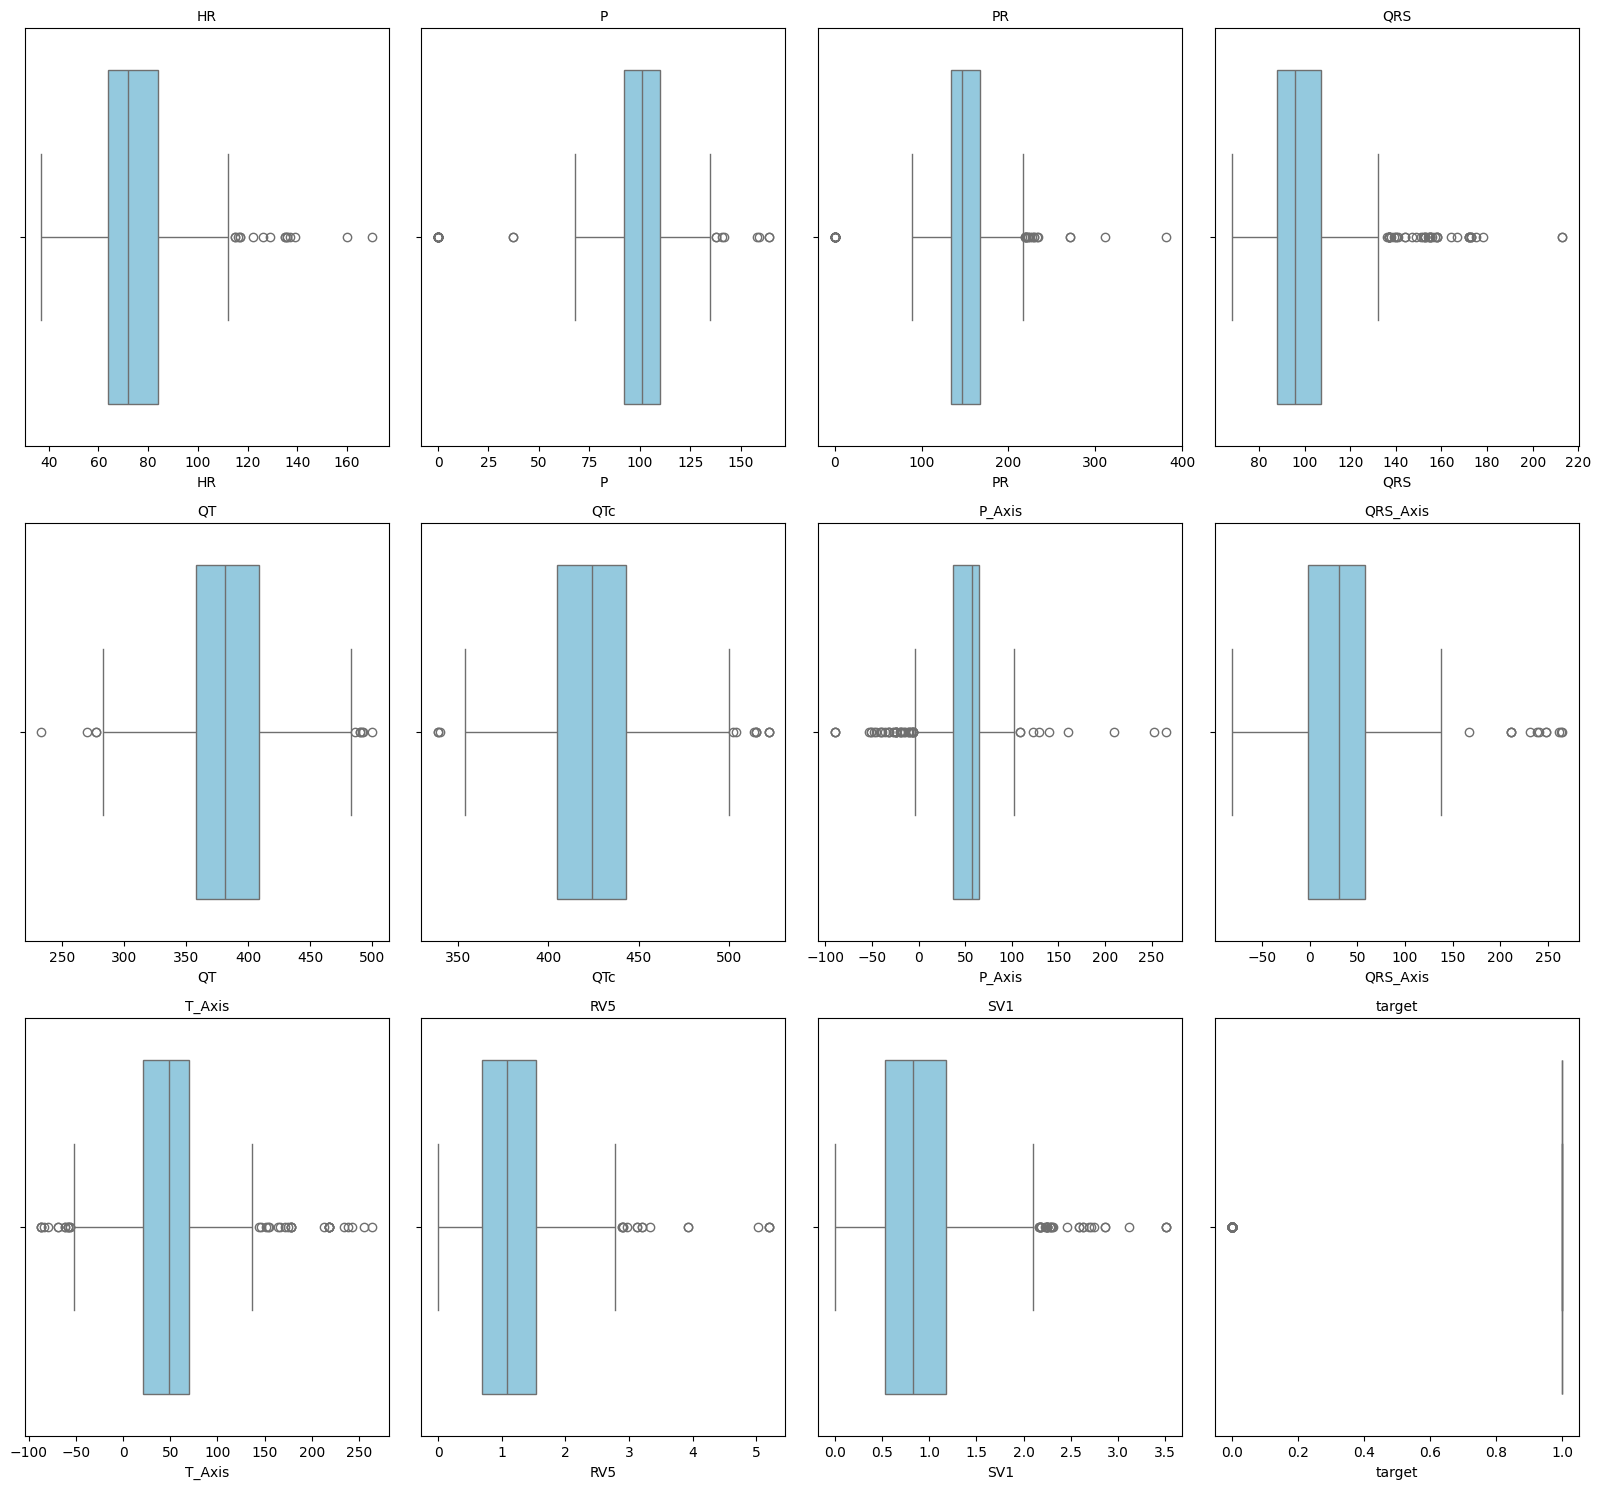

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Number of plots per row
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # auto rows

# Create subplots grid
plt.figure(figsize=(4*n_cols, 5*n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()

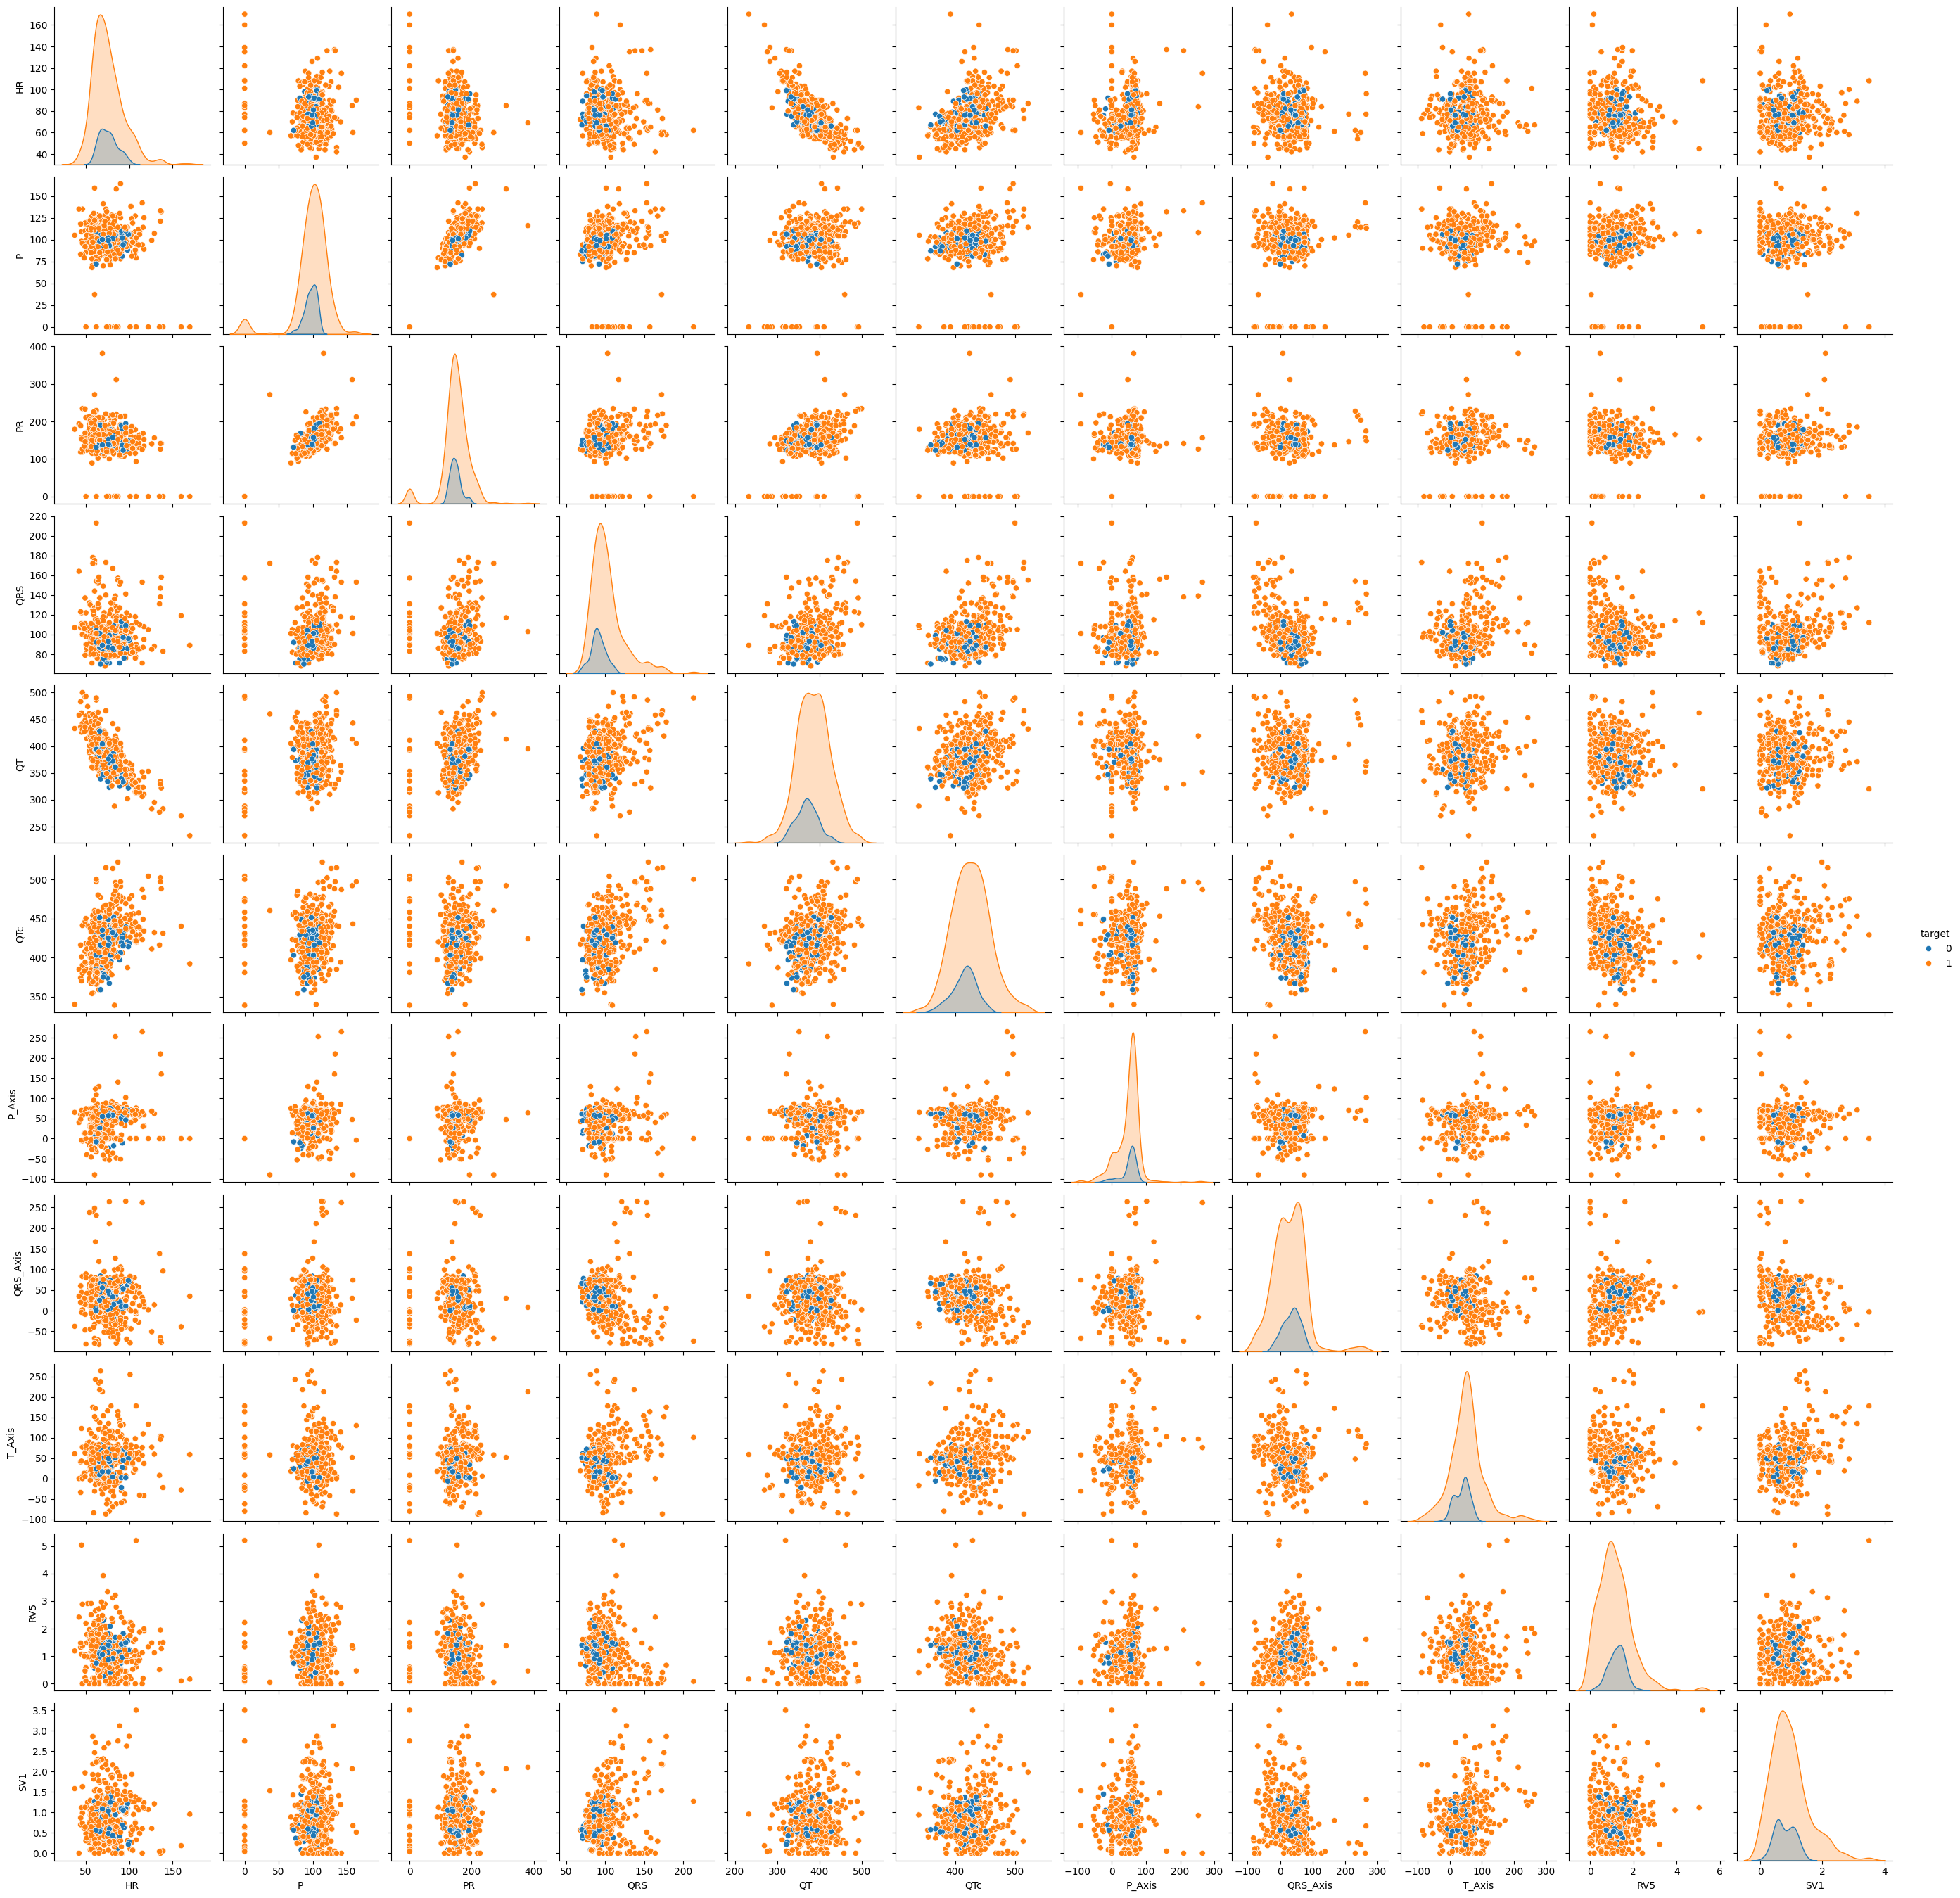

In [13]:
sns.pairplot(df,hue = 'target')
plt.show()